In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import os
from inspect import cleandoc
import timeit
from experiments.performance._benchmark_utils import do_op_instrumentation_benchmarks, \
    do_op_inspections_benchmarks, OperatorBenchmarkType, do_full_pipeline_benchmarks, \
    PipelineBenchmarkType
import matplotlib
import statistics

from mlinspect.utils import get_project_root

from IPython.utils import io

import warnings
warnings.filterwarnings('ignore')

Defined plot_runtimes, example output:
run_row_numbers
[100, 1000, 10000, 100000]
time_per_run
[0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]


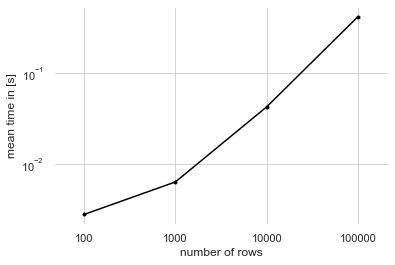

In [2]:
def plot_runtimes(run_row_numbers, time_per_run, title_and_path, save_to_file=False):
    print("run_row_numbers")
    print(run_row_numbers)
    print("time_per_run")
    print(time_per_run)
    # Data for plotting
    np_times = np.array(time_per_run)
    np_row_numbers = np.array(run_row_numbers)

    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    
    ax.set_yscale('log') # TODO: Decide how to plot this
    ax.plot(np_times, marker='o', color='black', markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    #fig.set_size_inches(8, 10)
    ax.axis('equal')
    #plt.locator_params("y", numticks=12)
    #major_ticks = [0.001, 0.01, 0.1, 1., 10.][:len(run_row_numbers)]
    #ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time in [s]')
    ax.grid(True, color='lightgrey')
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()
    
test_row_numbers = [100, 1000, 10000, 100000]
test_plot_runtimes = [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]

print('Defined plot_runtimes, example output:')
plot_runtimes(test_row_numbers, test_plot_runtimes, 'test_plot_runtimes')

Defined plot_runtimes_all, example output:
run_row_numbers
[100, 1000, 10000, 100000]
benchmark_results
{'no_mlinspect': [0.0005420450000000798, 0.0005361602000002463, 0.0005246571999999005, 0.0010252619999999268], 'no_inspection': [0.0022168788499999257, 0.0022983642499999402, 0.0023646199999999506, 0.0028484614500001726], 'one_inspection': [0.002515717000000084, 0.0038362508500000116, 0.025606818549999976, 0.17484780609999992], 'two_inspections': [0.002726666, 0.004980573499999963, 0.03439934060000005, 0.28592700379999964], 'three_inspections': [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]}


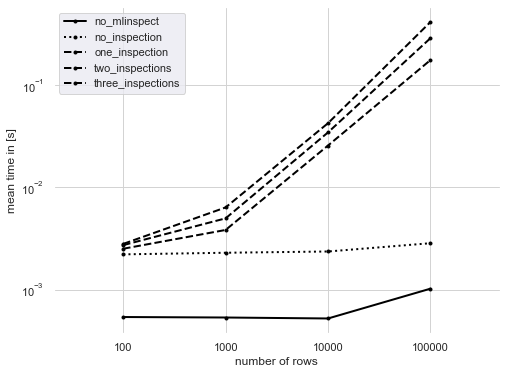

In [3]:
def plot_runtimes_all(run_row_numbers, benchmark_results, linestyles, title_and_path, save_to_file=False):
    print("run_row_numbers")
    print(run_row_numbers)
    print("benchmark_results")
    print(benchmark_results)
    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    ax.set_yscale('log') # TODO: Decide how to plot this
    
    #ax.plot(losses_orig, marker='o', color='black', linewidth=2, linestyle='dashed', label="orig")
    for label, results in benchmark_results.items():
        # Data for plotting
        np_times = np.array(results)
        if label in linestyles:
            linestyle = linestyles[label]
            ax.plot(np_times, marker='o', color='black', linewidth=2, linestyle=linestyle, label=label, markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    fig.set_size_inches(8, 6)
    ax.axis('equal')
    # major_ticks = np.arange(0, 10, 3)
    # ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time in [s]')
    ax.grid(True, color='lightgrey')
    
    plt.legend()
    
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()

test_row_numbers = [100, 1000, 10000, 100000]
test_benchmark_results = {\
    "no_mlinspect": [0.0005420450000000798, 0.0005361602000002463, 0.0005246571999999005, 0.0010252619999999268],
    "no_inspection": [0.0022168788499999257, 0.0022983642499999402, 0.0023646199999999506, 0.0028484614500001726],
    "one_inspection": [0.002515717000000084, 0.0038362508500000116, 0.025606818549999976, 0.17484780609999992],
    "two_inspections": [0.002726666, 0.004980573499999963, 0.03439934060000005, 0.28592700379999964],
    "three_inspections": [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]
}

print('Defined plot_runtimes_all, example output:')
linestyles = {"no_mlinspect": "solid", 
             "no_inspection": "dotted", 
             "one_inspection": "dashed", 
             "two_inspections": "dashed", 
             "three_inspections": "dashed"}
plot_runtimes_all(test_row_numbers, test_benchmark_results, linestyles, 'test_plot_runtimes_all')

Defined box_plot_full_pipeline_results, example output:
benchmark_results
{'no mlinspect': [0.3328154240000458, 0.29041089500003636, 0.28595826900004795, 0.30949507700006507, 0.2908414740001035], 'no inspection': [0.3638599429999658, 0.334859200999972, 0.35457435500006795, 0.3023559349999232, 0.3244804189999968], 'one inspection': [1.1991266320000022, 1.2222170320000032, 1.309182582999938, 1.2018000110000457, 1.2360804480000525], 'two inspections': [1.720092654000041, 1.7146672159999525, 1.7053870940000024, 1.7045333490000303, 1.7027777409999771], 'three inspections': [2.2129864439999665, 2.2243778859999566, 2.2320164879999993, 2.2251516389999324, 2.5162970650000034]}


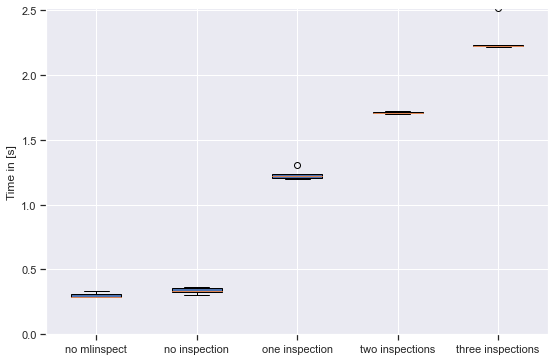

In [4]:
def box_plot_full_pipeline_results(benchmark_results, name, save_to_file=False):    
    print("benchmark_results")
    print(benchmark_results)
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))

    # Create an axes instance
    ax = fig.add_subplot(111)
    
    ## add patch_artist=True option to ax.boxplot() 
    ## to get fill color
    data_to_plot = benchmark_results.values()
    bp = ax.boxplot(data_to_plot, patch_artist=True)

    ## change outline color, fill color and linewidth of the boxes
    #for box in bp['boxes']:
    #    # change outline color
    #    box.set( color='#7570b3', linewidth=2)
        # change fill color
    #    box.set( facecolor = '#1b9e77' )

    ## change color and linewidth of the whiskers
    #for whisker in bp['whiskers']:
    #    whisker.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the caps
    #for cap in bp['caps']:
    #    cap.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the medians
    #for median in bp['medians']:
    #    median.set(color='#b2df8a', linewidth=2)

    ## change the style of fliers and their fill
    #for flier in bp['fliers']:
    #    flier.set(marker='o', color='#e7298a', alpha=0.5)
        
    ## Custom x-axis labels
    ax.set_xticklabels(benchmark_results.keys())
    
    ## Remove top axes and right axes ticks
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    ax.set_ylabel('Time in [s]')
    
    ax.autoscale(enable=True, tight=True)
    ax.set_ylim([0.0, None])

    # Save the figure
    if save_to_file:
        fig.savefig(result_file_name + '.svg', bbox_inches='tight')
    plt.show()
    plt.close()

print('Defined box_plot_full_pipeline_results, example output:')
test_benchmark_results = {
    "no mlinspect": [0.3328154240000458, 0.29041089500003636, 0.28595826900004795, 0.30949507700006507, 0.2908414740001035],
    "no inspection": [0.3638599429999658, 0.334859200999972, 0.35457435500006795, 0.3023559349999232, 0.3244804189999968],
    "one inspection": [1.1991266320000022, 1.2222170320000032, 1.309182582999938, 1.2018000110000457, 1.2360804480000525],
    "two inspections": [1.720092654000041, 1.7146672159999525, 1.7053870940000024, 1.7045333490000303, 1.7027777409999771],
    "three inspections": [2.2129864439999665, 2.2243778859999566, 2.2320164879999993, 2.2251516389999324, 2.5162970650000034]
}
box_plot_full_pipeline_results(test_benchmark_results, "test_box_plot_full_pipeline_results")

In [5]:
def benchmark_op_instrumentation_and_plot_result(op_type: OperatorBenchmarkType, plot_linestyles, repeats):
    print("Instrumentation Results for {}".format(op_type.value))
    mean_benchmark_results = {}

    for row_number in row_numbers:
        benchmark_results = do_op_instrumentation_benchmarks(row_number, op_type, repeats)
        for label, results in benchmark_results.items():
            current_list = mean_benchmark_results.get(label, [])
            current_list.append(statistics.mean(results))
            mean_benchmark_results[label] = current_list

        print("Done: {}".format(row_number))

    for label, results in mean_benchmark_results.items():
        print("{}: {}".format(label, results))
    
    plot_runtimes_all(row_numbers, mean_benchmark_results, plot_linestyles, 'all_runtimes_projection')

In [6]:
def benchmark_op_inspections_and_plot_result(op_type: OperatorBenchmarkType, plot_linestyles, repeats):
    print("Inspection Results for {}".format(op_type.value))
    mean_benchmark_results = {}

    for row_number in row_numbers:
        benchmark_results = do_op_inspections_benchmarks(row_number, op_type, repeats)
        for label, results in benchmark_results.items():
            current_list = mean_benchmark_results.get(label, [])
            current_list.append(statistics.mean(results))
            mean_benchmark_results[label] = current_list

        print("Done: {}".format(row_number))

    for label, results in mean_benchmark_results.items():
        print("{}: {}".format(label, results))
    
    plot_runtimes_all(row_numbers, mean_benchmark_results, plot_linestyles, 'all_runtimes_projection')

In [7]:
def benchmark_full_pipeline_and_plot_result(pipeline: PipelineBenchmarkType, repeats):
    print("Full Pipeline Execution Results for {}".format(pipeline.value))
    with io.capture_output() as captured:
        benchmark_results = do_full_pipeline_benchmarks(pipeline, repeats)
    mean_benchmark_results = {}
    for label, results in benchmark_results.items():
        mean_benchmark_results[label] = statistics.mean(results)
        
    print("Results")
    for label, results in benchmark_results.items():
        print("{}: {}".format(label, results))

    print("Mean Results")
    for label, results in mean_benchmark_results.items():
        print("{}: {}".format(label, results))
        
    box_plot_full_pipeline_results(benchmark_results, pipeline.value)

In [8]:
#row_numbers = [100, 1000, 10000]
#row_numbers = [100, 1000, 10000, 100000]
row_numbers = [100, 1000, 10000, 100000, 1000000]

#repeats = 1
#repeats = 5
#repeats = 15
repeats = 20

instrumentation_linestyles = {"no mlinspect": "solid", # Can be commented out to remove it from plot
    "no inspection": "dotted", 
    "one inspection": "dashed", 
    "two inspections": "dashed", 
    "three inspections": "dashed"}

inspection_linestyles = {"empty inspection": "solid",
    "MaterializeFirstOutputRows(10)": "dotted", 
    "RowLineage(10)": "dashed", 
    "HistogramForColumns(['group_col_1'])": "dashdot",
    "HistogramForColumns(['group_col_1', 'group_col_2', 'group_col_3'])": "dashdot"}

Instrumentation Results for projection
Done: 100
Done: 1000
Done: 10000
Done: 100000
Done: 1000000
no mlinspect: [0.0005953403000000356, 0.0004357992500001462, 0.0004898602000000807, 0.0006943959999998305, 0.0018102816999984838]
no inspection: [0.0019014233499998756, 0.0018551400000000663, 0.0020102299500001307, 0.0020457761500003004, 0.003119355250000666]
one inspection: [0.0023307967500000083, 0.0038661816000000737, 0.021279016750000056, 0.19344740889999965, 1.9045904976999992]
two inspections: [0.0024934860000001002, 0.005115844000000047, 0.03192986030000009, 0.2942777447499999, 2.9729388563000017]
three inspections: [0.002688275949999852, 0.006104907049999974, 0.04081921795000021, 0.39309627345, 4.0083682307499915]
run_row_numbers
[100, 1000, 10000, 100000, 1000000]
benchmark_results
{'no mlinspect': [0.0005953403000000356, 0.0004357992500001462, 0.0004898602000000807, 0.0006943959999998305, 0.0018102816999984838], 'no inspection': [0.0019014233499998756, 0.0018551400000000663, 0.0

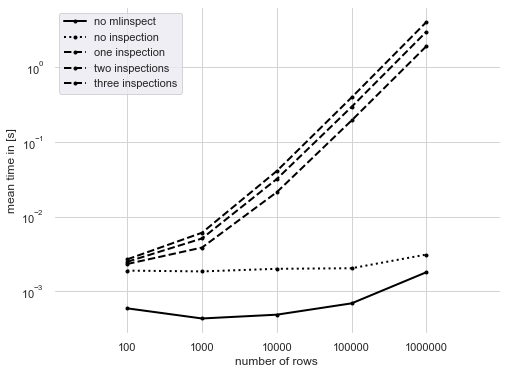

In [9]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.PROJECTION, instrumentation_linestyles, repeats)

Instrumentation Results for selection
Done: 100
Done: 1000
Done: 10000
Done: 100000
Done: 1000000
no mlinspect: [0.0005666658000052394, 0.00037454620000403337, 0.0006397192999997969, 0.0023912179000092236, 0.026844491250022882]
no inspection: [0.004275191499988296, 0.00417508440000347, 0.005325980449998724, 0.01978806550000627, 0.18490496864998818]
one inspection: [0.00781624964998855, 0.010770494600001257, 0.041609667450001095, 0.35086875019999864, 3.623263329400004]
two inspections: [0.008432486600008815, 0.012714866149985937, 0.0596365720000108, 0.5103978627999993, 5.218289155300022]
three inspections: [0.008796543699992299, 0.014936722049998252, 0.07545371959998874, 0.6613644356500004, 6.7799366395000105]
run_row_numbers
[100, 1000, 10000, 100000, 1000000]
benchmark_results
{'no mlinspect': [0.0005666658000052394, 0.00037454620000403337, 0.0006397192999997969, 0.0023912179000092236, 0.026844491250022882], 'no inspection': [0.004275191499988296, 0.00417508440000347, 0.00532598044999

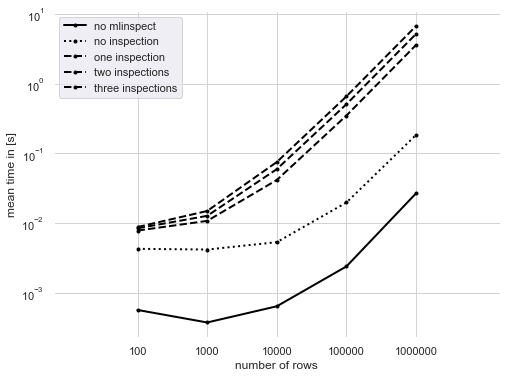

In [10]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.SELECTION, instrumentation_linestyles, repeats)

Instrumentation Results for join
Done: 100
Done: 1000
Done: 10000
Done: 100000
Done: 1000000
no mlinspect: [0.0015066150500160802, 0.0015427766999891901, 0.003045162799980972, 0.01875428319999628, 0.35473411580001085]
no inspection: [0.005341381949995139, 0.0056235417500033694, 0.00960717159999831, 0.05728289214998768, 0.7697921277999967]
one inspection: [0.012982813399969474, 0.01641637484999592, 0.0547921373000122, 0.4612186304000033, 5.0627289131]
two inspections: [0.01302578654995159, 0.017787288099998477, 0.07105984560000707, 0.6091196444999809, 6.473553406350026]
three inspections: [0.013253273349982919, 0.019538113550026992, 0.08333841575002907, 0.7321792356999822, 7.796830644050021]
run_row_numbers
[100, 1000, 10000, 100000, 1000000]
benchmark_results
{'no mlinspect': [0.0015066150500160802, 0.0015427766999891901, 0.003045162799980972, 0.01875428319999628, 0.35473411580001085], 'no inspection': [0.005341381949995139, 0.0056235417500033694, 0.00960717159999831, 0.057282892149987

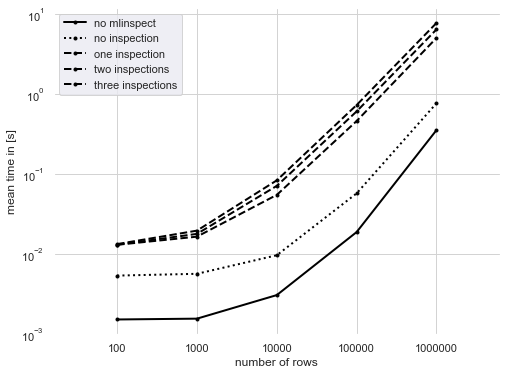

In [11]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.JOIN, instrumentation_linestyles, repeats)

Instrumentation Results for one_hot_encoder
Done: 100
Done: 1000
Done: 10000
Done: 100000
Done: 1000000
no mlinspect: [0.0005479989500145166, 0.0007111448000387099, 0.002255834299990056, 0.017789314149990788, 0.18463255900001058]
no inspection: [0.0020305034500097464, 0.002142751650012542, 0.003697960299996339, 0.019262004350025563, 0.18996695285004533]
one inspection: [0.0023211836000200494, 0.003827581299992744, 0.017284849599968767, 0.1552929569999833, 1.5575595955500148]
two inspections: [0.0023909654498993405, 0.004646140750014638, 0.02725183194993406, 0.25545425214997974, 2.641583826349984]
three inspections: [0.0025392535000264616, 0.0057984169499377455, 0.03630097415007185, 0.34844151854993016, 3.566845562049957]
run_row_numbers
[100, 1000, 10000, 100000, 1000000]
benchmark_results
{'no mlinspect': [0.0005479989500145166, 0.0007111448000387099, 0.002255834299990056, 0.017789314149990788, 0.18463255900001058], 'no inspection': [0.0020305034500097464, 0.002142751650012542, 0.0036

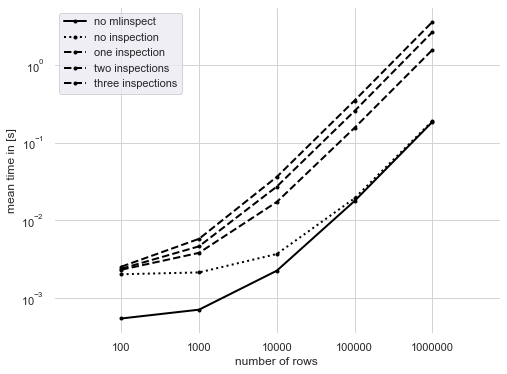

In [12]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.ONE_HOT_ENCODER, instrumentation_linestyles, repeats)

Instrumentation Results for standard_scaler
Done: 100
Done: 1000
Done: 10000
Done: 100000
Done: 1000000
no mlinspect: [0.0021659071000158293, 0.002144083299981503, 0.002333392800051115, 0.002666370100018867, 0.01686086925003565]
no inspection: [0.003669949350000934, 0.0035618342500129073, 0.0036236825000969474, 0.004272697300029904, 0.01844677060005324]
one inspection: [0.004079459349986792, 0.005256280000025981, 0.017232910950042424, 0.14004494235002768, 1.3750110101499557]
two inspections: [0.0040261156999577, 0.006079331349974381, 0.027446648399995867, 0.24327921420003804, 2.504014830750043]
three inspections: [0.00418728940010169, 0.00716389545000311, 0.03620160960003886, 0.3374907803000042, 3.4463338760500393]
run_row_numbers
[100, 1000, 10000, 100000, 1000000]
benchmark_results
{'no mlinspect': [0.0021659071000158293, 0.002144083299981503, 0.002333392800051115, 0.002666370100018867, 0.01686086925003565], 'no inspection': [0.003669949350000934, 0.0035618342500129073, 0.00362368250

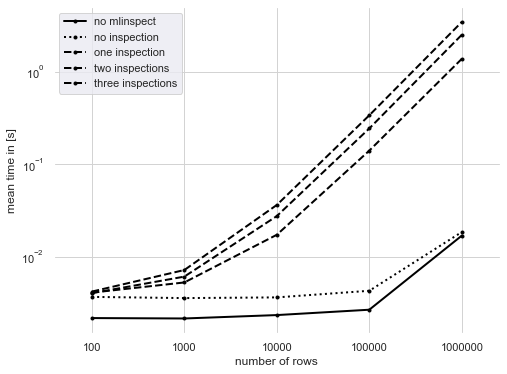

In [13]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.STANDARD_SCALER, instrumentation_linestyles, repeats)

Instrumentation Results for decision_tree
Done: 100
Done: 1000
Done: 10000
Done: 100000
Done: 1000000
no mlinspect: [0.0030076564500859603, 0.009871184999929028, 0.059780812099961625, 0.6111452162500199, 11.108997845399973]
no inspection: [0.004706267349888549, 0.011524291300042932, 0.06140841234998788, 0.6155678458999319, 10.893442470549962]
one inspection: [0.008417902600012895, 0.021919097500017415, 0.13725779965004675, 1.3225183463500116, 17.98575343449995]
two inspections: [0.008647346650013788, 0.023102298800017705, 0.15324997554996572, 1.5645743784999695, 20.429099915249935]
three inspections: [0.00882895249997091, 0.024103481350016408, 0.1702575680000109, 1.6488405676999718, 21.33240363914997]
run_row_numbers
[100, 1000, 10000, 100000, 1000000]
benchmark_results
{'no mlinspect': [0.0030076564500859603, 0.009871184999929028, 0.059780812099961625, 0.6111452162500199, 11.108997845399973], 'no inspection': [0.004706267349888549, 0.011524291300042932, 0.06140841234998788, 0.61556784

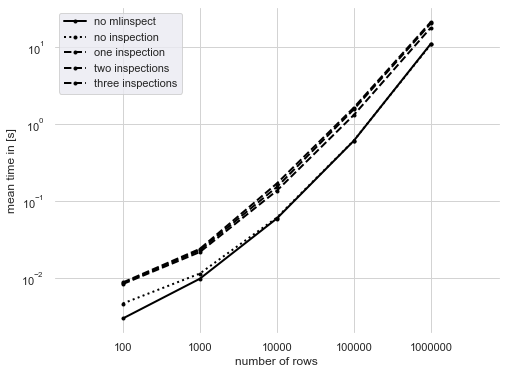

In [14]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.DECISION_TREE, instrumentation_linestyles, repeats)

Inspection Results for projection
Done: 100
Done: 1000
Done: 10000
Done: 100000
Done: 1000000
empty inspection: [0.0022905151001850754, 0.003876839550002842, 0.020277802650116427, 0.1831443873500575, 1.8891910548000397]
MaterializeFirstOutputRows(10): [0.002462024050009859, 0.004077824999922086, 0.022034705900023255, 0.19440978614989035, 1.992766043749907]
RowLineage(10): [0.002703495349987861, 0.004482057750055901, 0.022142617850067835, 0.2107594409500507, 2.0780311962500493]
HistogramForColumns(['group_col_1']): [0.0021816899999976156, 0.004338171549989056, 0.026757127150040104, 0.24693319769990013, 2.528836443399905]
HistogramForColumns(['group_col_1', 'group_col_2', 'group_col_3']): [0.002347964749969833, 0.005090589049996197, 0.033019198449937906, 0.3154775461999634, 3.2470878587498193]
run_row_numbers
[100, 1000, 10000, 100000, 1000000]
benchmark_results
{'empty inspection': [0.0022905151001850754, 0.003876839550002842, 0.020277802650116427, 0.1831443873500575, 1.8891910548000397

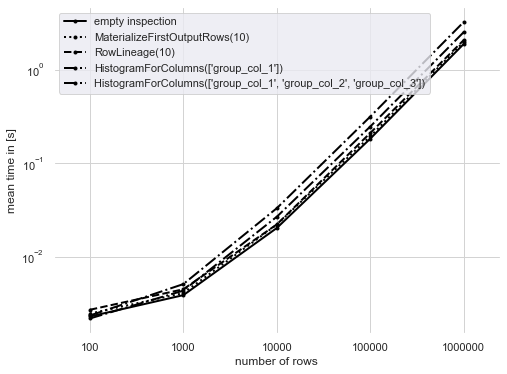

In [15]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.PROJECTION, inspection_linestyles, repeats)

Inspection Results for selection
Done: 100
Done: 1000
Done: 10000
Done: 100000
Done: 1000000
empty inspection: [0.008082372099943313, 0.010860429050080712, 0.04151380714993138, 0.3402600504000475, 3.5832657503000065]
MaterializeFirstOutputRows(10): [0.008824196200021107, 0.011557228549963838, 0.043985013650126345, 0.36685807359995126, 3.7250721773998974]
RowLineage(10): [0.00929356655005904, 0.012568843600047331, 0.045543718099816034, 0.39323928824996984, 4.061345607700059]
HistogramForColumns(['group_col_1']): [0.007669260449893045, 0.011796998899944811, 0.05131512030002341, 0.45047305770012824, 4.600248768999836]
HistogramForColumns(['group_col_1', 'group_col_2', 'group_col_3']): [0.00792346144999101, 0.013109955300024012, 0.0627490928502084, 0.5524440461500035, 5.69745949714993]
run_row_numbers
[100, 1000, 10000, 100000, 1000000]
benchmark_results
{'empty inspection': [0.008082372099943313, 0.010860429050080712, 0.04151380714993138, 0.3402600504000475, 3.5832657503000065], 'Material

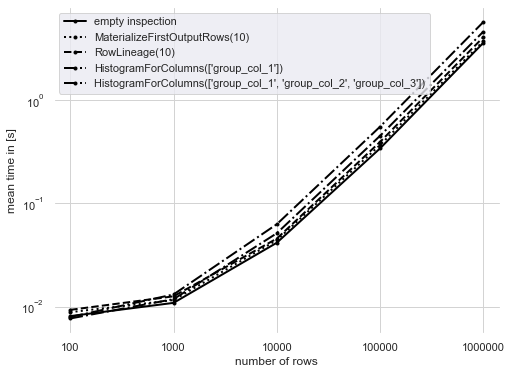

In [16]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.SELECTION, inspection_linestyles, repeats)

Inspection Results for join
Done: 100
Done: 1000
Done: 10000
Done: 100000
Done: 1000000
empty inspection: [0.013435182249941136, 0.01684645074992659, 0.056048801799943246, 0.4740594610998869, 5.128769147500089]
MaterializeFirstOutputRows(10): [0.013897767399976146, 0.01734260224989157, 0.057001831199841035, 0.4842636284500713, 5.252632889199868]
RowLineage(10): [0.01370557979998921, 0.01854125205004493, 0.0644734351500574, 0.6441647373998421, 7.028203554549964]
HistogramForColumns(['group_col_1']): [0.012870157299903439, 0.017395980450055505, 0.059696454850063675, 0.5625857622500007, 6.221066231750138]
HistogramForColumns(['group_col_1', 'group_col_2', 'group_col_3']): [0.012894842450077704, 0.01828559760006101, 0.0708005346000391, 0.6551590750999366, 7.241558806100147]
run_row_numbers
[100, 1000, 10000, 100000, 1000000]
benchmark_results
{'empty inspection': [0.013435182249941136, 0.01684645074992659, 0.056048801799943246, 0.4740594610998869, 5.128769147500089], 'MaterializeFirstOutpu

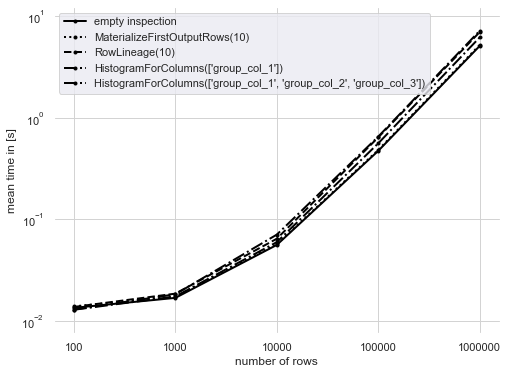

In [17]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.JOIN, inspection_linestyles, repeats)

Inspection Results for one_hot_encoder
Done: 100
Done: 1000
Done: 10000
Done: 100000
Done: 1000000
empty inspection: [0.002463668800101004, 0.0038214810499084704, 0.01789971130028789, 0.1532375066500208, 1.5404077352997774]
MaterializeFirstOutputRows(10): [0.00253315375002785, 0.003995959399708227, 0.01878307914994366, 0.16318858854992868, 1.6338983193500098]
RowLineage(10): [0.0030406990501433027, 0.004508004999570403, 0.019784482550039683, 0.17588708459988994, 1.7061727492499812]
HistogramForColumns(['group_col_1']): [0.0023623397496521648, 0.004129152950008574, 0.02342905605000851, 0.21754783635014974, 2.2036775029998354]
HistogramForColumns(['group_col_1', 'group_col_2', 'group_col_3']): [0.0024694526003258945, 0.004791804149954259, 0.03013942974994279, 0.29510334965016227, 2.885185681349958]
run_row_numbers
[100, 1000, 10000, 100000, 1000000]
benchmark_results
{'empty inspection': [0.002463668800101004, 0.0038214810499084704, 0.01789971130028789, 0.1532375066500208, 1.540407735299

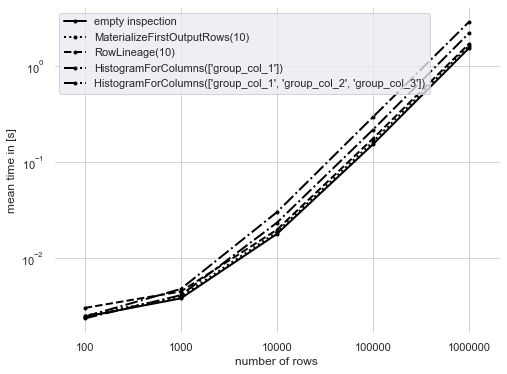

In [18]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.ONE_HOT_ENCODER, inspection_linestyles, repeats)

Full Pipeline Execution Results for healthcare (1000 rows)
Results
no mlinspect: [1.205461612000363, 0.9163808319990494, 0.9132910570006061, 0.9128149640000629, 0.9148692980015767, 0.9128782019997743, 0.9058516820005025, 0.9068124850000459, 0.9054390959990997, 0.9102085120011907, 0.9123712430009618, 0.930257748999793, 0.9107298760009144, 0.9101446409986238, 0.9192349420009123, 0.9069525689992588, 0.9130873499998415, 0.9108669020006346, 0.9104866269990453, 0.9107852190008998]
no inspection: [1.1280185359992174, 1.0215665019986773, 1.0215287170012743, 1.0230398340008833, 1.0306485219989554, 1.0148488340000767, 1.022131048999654, 1.0223078059989348, 1.0244394510009442, 1.0240028400003212, 1.0220697709992237, 1.0168494879999344, 1.0256599210006243, 1.0204873029997543, 1.0313566280001396, 1.0306480630006263, 1.039998407000894, 1.077706856000077, 1.0520408360007423, 1.0338124649988458]
one inspection: [1.090935742999136, 1.1277722409995476, 1.1155036800009839, 1.1281095840004127, 1.125031359

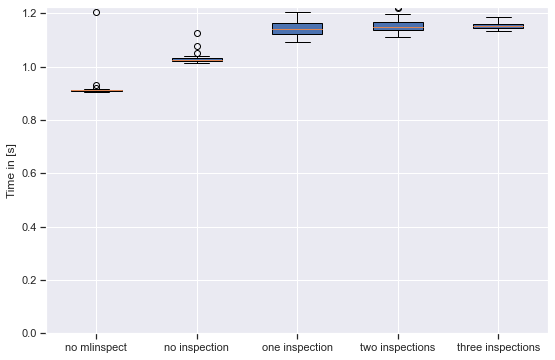

In [19]:
benchmark_full_pipeline_and_plot_result(PipelineBenchmarkType.HEALTHCARE, repeats)

Full Pipeline Execution Results for compas (train: 5050 rows, test: 2166)
Results
no mlinspect: [0.10898389500107442, 0.09478997999940475, 0.09291396499975235, 0.09782921300029557, 0.09673189900058787, 0.09707498399984615, 0.09714011500000197, 0.09574957599943446, 0.09721317699950305, 0.09681321599964576, 0.09857723900131532, 0.09729065600004105, 0.0981951220001065, 0.09816064199912944, 0.102913777998765, 0.1018386029991234, 0.09344113000042853, 0.093995900999289, 0.0939042049994896, 0.09375626600012765]
no inspection: [0.19782772799953818, 0.20468648099995335, 0.21752158700110158, 0.19757859300079872, 0.20344755200130749, 0.2159924180014059, 0.20229734900021867, 0.20349630400050955, 0.19176493099985237, 0.19484882899996592, 0.19879915899946354, 0.20439796800019394, 0.20399963000090793, 0.20321174200034875, 0.19182966399966972, 0.21241521299998567, 0.21821143200031656, 0.20262425399960193, 0.2295829140002752, 0.2231102940004348]
one inspection: [0.6841245870000421, 0.6281242309996742, 

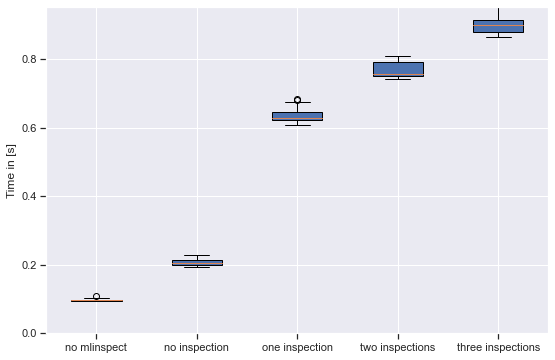

In [20]:
benchmark_full_pipeline_and_plot_result(PipelineBenchmarkType.COMPAS, repeats)

Full Pipeline Execution Results for adult_simple (22793 rows)
Results
no mlinspect: [0.2922201689998474, 0.26097009100158175, 0.2582674990007945, 0.2624339619997045, 0.2679982359986752, 0.2716774300006364, 0.25954308599830256, 0.2687375690002227, 0.25929288900078973, 0.2599652930002776, 0.2598231419997319, 0.27122251899891126, 0.2660068870009127, 0.2614127609995194, 0.26513055699979304, 0.2688681820000056, 0.27965128699906927, 0.28046197399999073, 0.27891818399984913, 0.2784570290004922]
no inspection: [0.320292636000886, 0.3194884020012978, 0.3191652699988481, 0.3223342909986968, 0.3141689470012352, 0.3037675189989386, 0.29483523199996853, 0.29546255099921837, 0.302901061000739, 0.30755200699968555, 0.31889943799978937, 0.3165846629999578, 0.3013615859999845, 0.310961386998315, 0.3195898969988775, 0.3029667770006199, 0.2974647270002606, 0.2950005829989095, 0.30699304699919594, 0.29622434900011285]
one inspection: [1.2613423350012454, 1.2238776060003147, 1.2102431639996212, 1.206842915

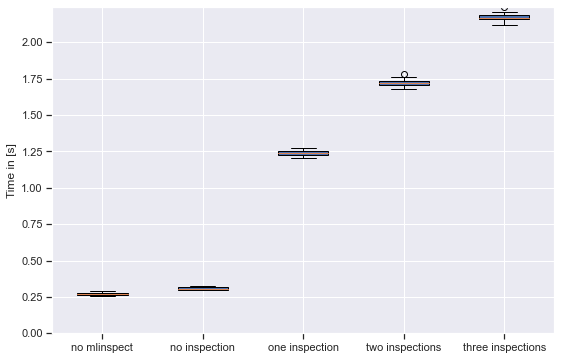

In [21]:
benchmark_full_pipeline_and_plot_result(PipelineBenchmarkType.ADULT_SIMPLE, repeats)

Full Pipeline Execution Results for adult_complex (train: 22793 rows, test: 9770 rows)
Results
no mlinspect: [0.4766657860000123, 0.4483418830004666, 0.4536234189999959, 0.44193172399900504, 0.6397779199996876, 0.5302197679993697, 0.43723279100049695, 0.4313800710006035, 0.5942095330010488, 0.7306348879992584, 0.5900153530001262, 0.49568782200003625, 0.45195650099958584, 0.4533704299992678, 0.45034438599941495, 0.4512959880012204, 0.4446643259998382, 0.44494599199970253, 0.45685350299936545, 0.7335029139994731]
no inspection: [0.5037492560004466, 0.48806853299902286, 0.7663740039988625, 0.6796824160010146, 0.5020616410001821, 0.7000702269997419, 0.49417199500021525, 0.4781757580003614, 0.47759927999868523, 0.47654460900048434, 0.5386287589990388, 0.4993984000011551, 0.49767940799938515, 0.4938448430002609, 0.4957819039991591, 0.7760437820015795, 0.758256106000772, 0.6073717380004382, 0.49931379400004516, 0.5459451040005661]
one inspection: [1.7176126480007952, 1.4509401149989571, 1.478

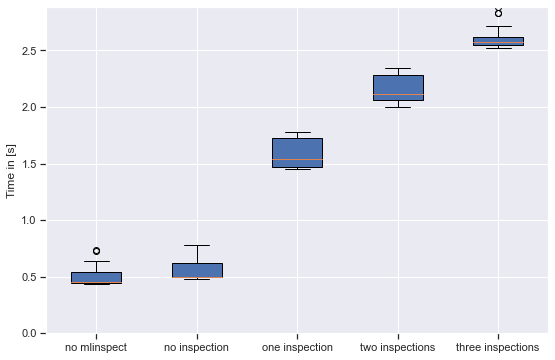

In [22]:
benchmark_full_pipeline_and_plot_result(PipelineBenchmarkType.ADULT_COMPLEX, repeats)